<img src="attachment:b1ac0ee6-95af-4bd6-844e-4fd3a254a850.gif" width="350" style="margin-left:auto; margin-right:auto" />
<h1><center>Project: Investigating Fandango Movie Ratings</center></h1>

#### The Goal
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after a data journalist named Walt Hickey analyzed movie ratings data.

#### The Scenario

In October 2015, data journalist Walt Hickey conducted an analysis of movie ratings data, uncovering compelling evidence indicating bias and dishonesty within [Fandango's](https://www.fandango.com/region-error) (the site can only be accessed in the USA) rating system, an online movie ratings aggregator. His findings, presented in a remarkable [piece](https://fivethirtyeight.com/features/fandango-movies-ratings/) of data journalism, shed light on significant insights regarding Fandango's rating practices, which merit thorough examination.

Fandango employs a 5-star rating system on its platform, with ratings ranging from 0 stars as the minimum to 5 stars as the maximum. Hickey's analysis revealed a substantial inconsistency between the star ratings presented to users and the actual ratings embedded within the HTML of the page. His investigation unveiled the following findings:

- The actual ratings were consistently rounded up to the nearest half-star, rather than rounding to the nearest whole number. For instance, a movie with a rating of 4.1 would be rounded to 4.5 stars instead of 4 stars.

- Approximately 8% of the analyzed ratings were rounded up to the nearest whole star, deviating from the expected half-star rounding. For example, a rating of 4.5 would be rounded to 5 stars.

- An anomaly was observed in one instance, where a rating of 4 in the HTML was displayed as 5 stars, indicating a somewhat rounding discrepancy.

<img src="attachment:81c8bf5c-08b3-4776-a229-de8d99e297ab.png" width="350" style="margin-left:auto; margin-right:auto" /><center>source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)</center>

The visualizations presented above show two distributions of movie ratings utilizing a simple line plot. The variable under examination is the movie rating, with each unique rating represented by its relative frequency (expressed as a percentage) along the y-axis. In reports targeting broader audiences, relative frequencies, particularly percentages, are favored over absolute frequencies. Both distributions exhibit noticable left skewness, indicating that movie ratings on Fandango predominantly fall within the high or very high range. Notably, no ratings below 2 stars are observed in the sample analyzed by Hickey. Moreover, the distribution of displayed ratings is visibly right-shifted in comparison to the actual rating distribution, strongly suggesting that Fandango inflates ratings behind the scenes.

#### The Data

The data that we will use for this analysis is, on the one hand, that of the journalist Walt Hickery. He publicly shared the dataset he examined on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We will use this dataset to scrutinize the attributes of Fandango's rating system before his analysis. 

To compare the system's characteristics after the analysis, we will use the data, made available through one of the dataquest team member. The member gathered movie ratings data for films released between 2016 and 2017, which is also accessible on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17).

Lets start.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

# Import packages for visualization
import matplotlib.pyplot as plt
from numpy import arange

%matplotlib inline
plt.style.use('fivethirtyeight')

#### Understanding the Data

We will analyze two samples of movie ratings: one collected before `Hickey's` analysis and the other collected after. Let's begin by importing and examining the structure of these two samples.





In [2]:
# Import the relevant datasets
hickery_data = pd.read_csv('fandango_score_comparison.csv')
dataquest_data = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
# Brief overview of the Hickery dataset
hickery_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
# Brief overview of the Hickery dataset
hickery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
# Brief overview of the Dataquest dataset
dataquest_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
# Brief overview of the Dataquest dataset
dataquest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Both datasets are free from of any missing values (NaN). The `Hickey` dataset comprises 146 entries, whereas the `Dataquest` dataset comprises 214 entries. Now, let's extract the columns containing `Fandango's` ratings information into separate variables to facilitate easier access to the specific data we're interested in for subsequent analysis. We'll make copies to avoid any `SettingWithCopyWarning`.




In [7]:
# Fandango columns of interest
fd_columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']

# Use the created column variable to extract just the relevant columns
fd_before = hickery_data[fd_columns].copy()

# Dataquest columns of interest
dq_columns = ['movie', 'year', 'fandango']

# Use the created column variable to extract just the relevant columns
fd_after = dataquest_data[dq_columns].copy()

In [8]:
# Check the new fandango dataset
fd_before.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
22,The Man From U.N.C.L.E. (2015),4.5,4.1,2686,0.4
103,Strange Magic (2015),3.5,3.4,1117,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
88,Mad Max: Fury Road (2015),4.5,4.3,10509,0.2


In [9]:
# Check the new dataquest dataset
fd_after.sample(5)

,movie,year,fandango
125,Now You See Me 2,2016,4.0
74,I.T.,2016,3.5
72,Hush,2016,4.0
150,Storks,2016,4.5
141,Sausage Party,2016,3.5


#### Is the data suitable?

Our objective is to assess any potential differences in Fandango's rating system post Hickey's analysis. Our analysis relates to all movie ratings stored on Fandango's website, regardless of the release year.

The data we're analyzing comprises two samples collected before and after the analysis. To accurately depict the population, it's crucial to ensure that these samples are representative. Otherwise, we risk encountering significant sampling error, leading to inaccurate conclusions. From the `README.md` of both sample data we get the following informations

##### Hickey's sampling criteria included:

- At least 30 fan ratings on Fandango's website (as of Aug. 24, 2015).
- Movie tickets available in 2015.

This sampling method, while suitable for Hickey's research, may not be representative of the entire population of interest due to potential temporal trends.

##### The criteria for the other sample were:

- Movie release in 2016 or later.
- Considerable number of votes and reviews (specifics unclear).

Both samples employed `selective sampling` to align with the researchers' objectives. While effective for their inquiries, these samples may not suit our analysis requirements.

#### New Goal

At this point, we have two main options: 
Either procure fresh data or refine the scope of our analysis by imposing constraints.

 Adjusting our analysis objective appears to be the more useful option compared to gathering new data. Moreover, obtaining a new sample predating Hickey's analysis is practically impossible at this time

Therefore our revised objective is to find out whether there exists a discrepancy in Fandango's ratings for popular movies released in 2015 compared to those released in 2016.
.

With our revised objective, we aim to analyze two distinct populations:

- All Fandango ratings for movies released in 2015, meeting the criteria of being "popular", defined as having a minimum of 30 fan ratings.
- All Fandango ratings for movies released in 2016, also meeting the criterion of being "popular" as defined above by `Hickey`, with a minimum of 30 fan ratings.

In [10]:
# Check count of votes for before sample data
fd_before['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [11]:
# Check if there are values below 30
(fd_before['Fandango_votes'] < 30).sum()

0

In [12]:
# Show the after fandango sample - no count of fan rating included
fd_after

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


Despite including movie popularity as one of the sampling criteria, in our second sample it lacks information regarding the number of fan ratings. Thus, we must question the sample's representativeness again, particularly concerning the inclusion of popular movies with over 30 fan ratings.

A rapid method to assess the sample's representativeness involves randomly selecting 10 movies from it and verifying the number of fan ratings on Fandango's website. Ideally, a minimum of 8 out of the 10 movies should have 30 fan ratings or more to ensure representativeness.

In [13]:
# Create a sample of 10 movies
fd_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:
| Movie | Rating |
|-------|---------|
|Mechanic: Resurrection	|2247|
|Warcraft	|7271|
|Max Steel	|493|
|Me Before You	|5263|
|Fantastic Beasts and Where to Find Them	|13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King	|500|
|Captain America: Civil War	|35057|

9 out of 10  movies in the table above are popular. Therefore we can assume, that 90% of the movies in the sample are popular, this provides us with enough assurance to proceed further.

Some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest. Lets do this task!





In [14]:
# Just isolate the year column for 2016
fd_2016 = fd_after[fd_after['year'] == 2016]

# Check the values generated
fd_2016['year'].value_counts(dropna=False)

year
2016    191
Name: count, dtype: int64

For the sample data generated by Hickey, there is no column refering to the year, but we can extract the year from the movie title

In [15]:
# create regex pattern
pattern = r'2015'

# use pattern to extract just the values containing the pattern
fd_2015 = fd_before['FILM'].str.contains(pattern)

# use boolean indexing to create new df with only 2015 movies
fd_2015 = fd_before[fd_2015].copy()

# create new column with year
fd_2015['Year'] = fd_2015['FILM'].str[-5:-1]

# Check new df and values of year column
fd_2015['Year'].value_counts(dropna=False)

Year
2015    129
Name: count, dtype: int64

#### Distribution Shapes for 2015 and 2016

After completing these initial steps, we are prepared to begin the analysis of the two previously isolated samples. Our primary objective remains to find out if there exists a disparity between the ratings provided by Fandango for popular movies in 2015 compared to those in 2016.

We will begin by comparing the distribution shapes of the two datasets using kernel density plots.







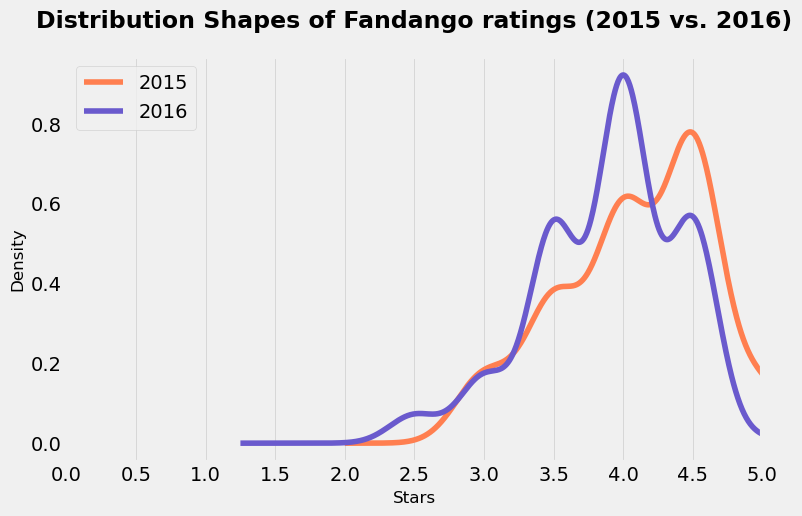

In [16]:
plt.figure(figsize=(8,5))

# Create the two kde plots
ax1 = fd_2015['Fandango_Stars'].plot.kde(grid=False, label = 2015, legend = True, color='coral')
ax2 = fd_2016['fandango'].plot.kde(grid=False, label = 2016, legend = True, color='slateblue')

# use ax1 to customize the grid
ax1.grid(axis='x', alpha=0.5, color='darkgrey', linewidth=0.5)

# Add title, xlabel, ylabel and adjust the xlim and xticks
plt.title('Distribution Shapes of Fandango ratings (2015 vs. 2016)', fontsize=17, weight='bold', y=1.05)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, 5)
plt.xticks(arange(0,5.1,.5)) 
plt.legend(loc='upper left')

# Show the plot
plt.show()

Several noteworthy observations arise from the figure above:

- The distribution for 2016 is subtly shifted to the left in comparison to the 2015 distribution.
- Both distributions do have strong left-skewness.
  
The left-skewed nature of both distributions implies that movies on Fandango predominantly receive high and very high fan ratings, which, considering Fandango's role in ticket sales, raises some skepticism. 

The slight leftward shift in the 2016 distribution is particularly relevant to our analysis. It indicates that ratings were marginally lower in 2016 than in 2015, suggesting a visible difference in Fandango's ratings for popular movies between the two years. Additionally, this shift highlights the direction of the difference, with 2016 ratings leaning slightly lower compared to those in 2015.

#### Comparing Relative Frequencies

The kernel density plots presented in the previous section revealed a clear difference between the two distributions and offered insight into the nature of this disparity: movies in 2016 received marginally lower ratings compared to those in 2015.

Although examining the distributions via kernel density plots was an informative initial step, further analysis of more detailed data is necessary at this point.

In [17]:
# Show the frequency distribution for 2015 movie ratings
fd_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [18]:
# Show the frequency distribution for 2016 movie ratings
fd_2016['fandango'].value_counts(normalize = True).sort_index() * 100

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

Above, we computed the frequency distributions for the 2015 and 2016 sample datasets. We utilized the `normalize` parameter within the `value_counts()` function to convert the values into `proportions`. Subsequently, we multiplied the results by 100 to express them as `percentages`.

As observed, the minimum star rating for the 2015 sample is 3.0, whereas for the 2016 sample, it is 2.5. This indicates a wider range of ratings in the 2016 sample.

Regarding the maximum ratings, both samples include 5-star ratings. However, the 2015 sample exhibits a considerably higher frequency of 5-star ratings compared to the 2016 sample. Specifically, while the 2015 sample comprises approximately 7% of 5-star ratings, this proportion drastically decreases to just 0.5% in the 2016 sample.

Furthermore, an interesting shift occurs in ratings between 3 and 5 stars. In 2015, around 38% of the ratings were 4.5 stars, 29% were 4 stars, and 18% were 3.5 stars. Conversely, in 2016, there is a nochangeration in these proportions. The percentage of 4.5-star ratings decreased by over 10% in 2016 (to 25%), whereas 4-star r ined, and 3.5-star ratings increased compared to 2015. Given that ratings of 3.5 and 4.0 stars are generally considered high, this shift challengtional pattern observed in the kernel density plots.

#### Determining the Direction of the Change

Based on the preceding two tables, we have proven a distinct disparity between the two distributions. Nevertheless, the specific direction of this difference is not as clear as illustrated in the kernel density plots.




In [19]:
fd_2015_mean = fd_2015['Fandango_Stars'].mean()
fd_2016_mean = fd_2016['fandango'].mean()

fd_2015_mode = fd_2015['Fandango_Stars'].mode()[0]
fd_2016_mode = fd_2016['fandango'].mode()[0]

fd_2015_median = fd_2015['Fandango_Stars'].median()
fd_2016_median = fd_2016['fandango'].median()

In [20]:
summary = pd.DataFrame()

summary['2015'] = [fd_2015_mean, fd_2015_mode, fd_2015_median]
summary['2016'] = [fd_2016_mean, fd_2016_mode, fd_2016_median]

summary.index = ['mean', 'mode', 'median']

summary

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


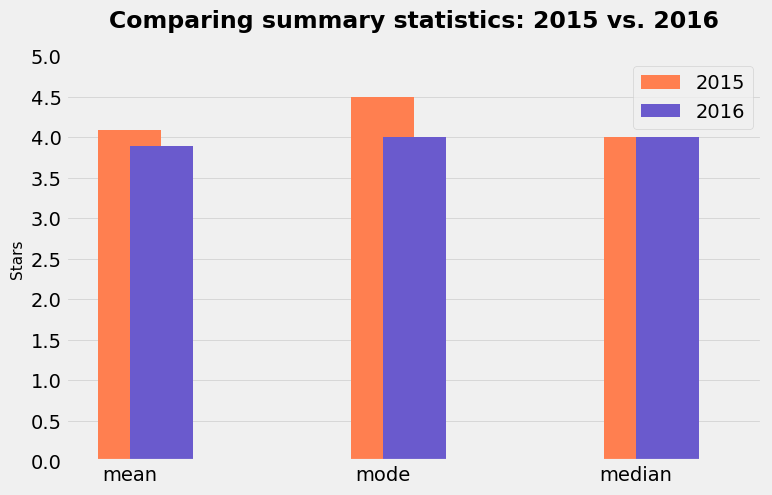

In [21]:
plt.figure(figsize=(8,5))

ax1 = summary['2015'].plot.bar(align='center', color='coral', width=.25, label='2015', grid=False)
ax2 = summary['2016'].plot.bar(align='edge', color='slateblue', width=.25, label='2016', rot=0, grid=False)

# use ax1 to customize the grid
ax1.grid(axis='y', alpha=0.5, color='darkgrey', linewidth=0.5)
plt.ylim(0,5)
plt.yticks(arange(0,5.1,0.5))
plt.title('Comparing summary statistics: 2015 vs. 2016', y=1.05, fontsize=17, weight='bold')
plt.ylabel('Stars', fontsize=11)
plt.legend()

As we an see in the summary table and also the plot above, the mean rating was lower in 2016 compared to 2015. We'll calculate the difference as follow:

```
mean of 2015 - mean of 2016 / mean of 2015
```


In [22]:
(summary.iloc[0][0] - summary.iloc[0][1]) / summary.iloc[0][0]

C:\Users\mexic\AppData\Local\Temp\ipykernel_39012\892429535.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (summary.iloc[0][0] - summary.iloc[0][1]) / summary.iloc[0][0]


0.04842683568951993

This means a drop of almost 5% relative to the mean rating in 2015.

Although the median remains consistent across both distributions, the mode in 2016 is lower by 0.5. When considering the mean as well, it corroborates the direction of change observed in the kernel density plot: on average, popular movies released in 2016 received slightly lower ratings compared to those released in 2015.




#### Conclusion

Our analysis revealed a subtle divergence between Fandango's ratings for popular movies in 2015 and 2016, indicating that, on average, popular movies released in 2016 received lower ratings on Fandango compared to those in 2015. While the precise cause of this change remains uncertain, it is highly probable that Fandango addressed the biased rating system identified by Hickey's analysis, leading to this alteration.

Fandango's representatives attributed the biased rounding to a system glitch rather than deliberate manipulation, committing to correct the issue quickly. Although it's presumed that this resolution has been implemented, confirmation is challenging as the actual rating value no longer appears in the HTML pages.






